# Configuration 



Dataset available on kaggle : https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [28]:
"""Importing torch library : PyTorch is an open-source ML library used for various tasks such as deep learning, neural networks, 
and tensor computations. It provides a flexible platform for training and learning models"""

import torch 

"""Numpy is for scientific computing with python. It provides support for large, multi-dimensional arrays and matrices, along
with mathematical functions to operate on these arrays"""

import numpy as np 

"""Matplotlib is a 2D plotting library. It allows you to create static, animated, and interactive visualizations in python"""

import matplotlib.pyplot as plt 

"""The os module provides a way of using operating system-dependent functionality, such as reading or writing to the file 
systems, interacting with command line etc"""

import os 

"""TQDM is a fast, extensible progress bar module for python and cli. It provides a visual indication of the progress
of an iterable's execution. example: adding progress bars to loops, monitoring the progress of data processing tasks."""

from tqdm.notebook import tqdm 

In [29]:
class CFG:
    
    epochs = 1                                         # No. of epochs of training the model 
    lr = 0.001                                         # Learning rate 
    batch_size = 16                                    # Batch Size For Dataset 
    
    model_name = 'tf_efficientnet_b4_ns'               # Model name (We are going to import model from timm)
    img_size = 224
    
    # Going to be use for loading dataset 
    DATA_DIR = "chest_xray_data"                       # Data Directory 
    TEST = 'test'                                      # Test folder name in data directory 
    TRAIN = 'train'                                    # Train folder name in data directory 
    VAL ='val'                                         # Valid folder name in data directory 
    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
print("On which device we are on : {}".format(device))

On which device we are on : cpu


# Image Transformation and Load Dataset 

In [30]:
""" TorchVision is a library within PyTorch for image and video processing, it contains a number of important and useful 
data sets, model architecture, as well as models and transformation operations that are commonly used for computer 
vision projects."""
"""transforms module within torchvision provides a set of common image transformations that can be applied to 
images or datasets. Aliasing it as T makes it easier to use."""
""" Transformations include resizing, cropping, flipping, normalization, etc. These transformations are often applied to images 
before training a neural network."""
"""Torchvision provides many built-in datasets in the torchvision.datasets module, as well as utility classes for building your 
own datasets."""
from torchvision import transforms as T, datasets



In [31]:
def show_image(image,label,get_denormalize = True):
    
    image = image.permute(1,2,0)
    mean = torch.FloatTensor([0.485, 0.456, 0.406])
    std = torch.FloatTensor([0.229, 0.224, 0.225])
    
    if get_denormalize == True:
        image = image*std + mean
        image = np.clip(image,0,1)
        plt.imshow(image)
        plt.title(label)
        
    else: 
        plt.imshow(image)
        plt.title(label)

Below code defines three different data transformations using the torchvision.transforms module in PyTorch. These transformations are commonly used in the context of image data preprocessing for machine learning tasks, especially in the training, validation, and testing phases.
Resize: Resizes the input image to the spcified size
Random Rotation : Applies a random rotation to the image, within the specified degree range. This is the form of data augmentation which helps the model generalize better by exposing it to slighly rotated versions of training images.
T.ToTensor : Converts the image data to pytorch tensor format. This is necessary for feeding the images to neural network.
T.Normalize : Normalizes the image tensor with mean and standard deviation values. This is a common practice to scale the pixel values of the image, which can help in improving the training process.

T.Compose function is used to chain these transformations together into a single transformation pipeline.

During training, introducing random rotations helps the model become more robust by exposing it to various orientations of the input images.
However, during evaluation (on validation and test datasets), you want to assess the model's ability to recognize objects without the influence of random transformations. This ensures that the model is tested on the original, unaltered data to provide a fair evaluation of its generalization performance.

In [32]:
train_transform = T.Compose([
    T.Resize(size = (CFG.img_size,CFG.img_size)),
    T.RandomRotation(degrees=(-20,+20)),         
    T.ToTensor(), #(h,w,c)  ->  (c,h,w)
    T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

valid_transform = T.Compose([
    T.Resize(size = (CFG.img_size,CFG.img_size)),
    T.ToTensor(), #(h,w,c)  ->  (c,h,w)
    T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])


test_transform = T.Compose([
    T.Resize(size = (CFG.img_size,CFG.img_size)),
    T.ToTensor(), #(h,w,c)  ->  (c,h,w)
    T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])            

The mean and standard deviation values used for normalizing images in the ImageNet dataset are as follows:

Mean: [0.485, 0.456, 0.406]
Standard Deviation: [0.229, 0.224, 0.225]
These values are commonly used for preprocessing images in deep learning models trained on the ImageNet dataset. The purpose of normalization is to scale the pixel values of the images so that they have a zero mean and a standard deviation of 1. This helps the model converge faster during training and improves its generalization performance.

The os.path.join is a method in the "os.path" module in python that is used to join one or more path components intelligently. It takes care of proper handling of path separators to create a valid path string. 
So CFG.DATA_DIR is directory and CFG.TRAIN is subdirectory

The assignment of 0 for "Normal" and 1 for "Pneumonia" is determined by the order in which the classes (subdirectories) are encountered and processed by the ImageFolder class during its initialization.

The datasets.ImageFolder class, provided by PyTorch's torchvision library, is designed for loading image datasets where images are organized in a folder structure. Each subdirectory within the specified directory (train_path in this case) corresponds to a different class or category, and the images within those subdirectories are considered instances of that class.

When you create the trainset using datasets.ImageFolder(train_path, transform=train_transform), PyTorch's ImageFolder class scans the subdirectories in the specified train_path. It assigns class indices based on the order in which it encounters the subdirectories. The first subdirectory it encounters is assigned a label of 0, the second subdirectory is assigned a label of 1, and so on.


In [33]:
train_path = os.path.join(CFG.DATA_DIR,CFG.TRAIN)
valid_path = os.path.join(CFG.DATA_DIR,CFG.VAL)
test_path = os.path.join(CFG.DATA_DIR,CFG.TEST)

trainset = datasets.ImageFolder(train_path,transform = train_transform)
validset = datasets.ImageFolder(valid_path,transform = valid_transform)
testset = datasets.ImageFolder(test_path,transform = test_transform)

In [34]:
print("Trainset Size : {}".format(len(trainset)))
print("Validset Size : {}".format(len(validset)))
print("Testset Size : {}".format(len(testset)))

Trainset Size : 5216
Validset Size : 16
Testset Size : 624


 The trainset[2] object is a tuple containing two components: The first component of the tuple contains the image data. This is the actual image that the trainset is representing.
 The second component of the tuple contains the label associated with that image. The label is an integer that represents the class to which the image belongs. The mapping between the label and the actual class is determined by the order in which classes are encountered during the initialization of the ImageFolder instance.
 
The T.RandomRotation transformation is designed to apply a random rotation to the input image within the specified degree range each time the image is accessed. This randomness is intended to augment the training dataset and increase the model's robustness by exposing it to variations in the input data.

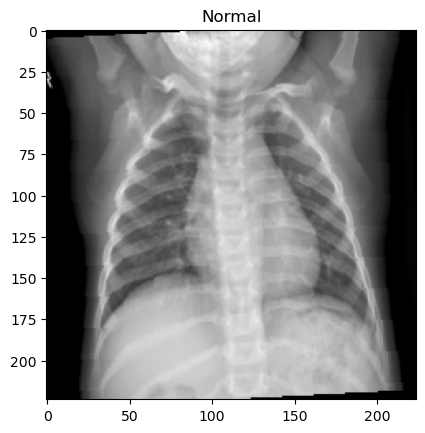

In [35]:
image,label = trainset[2]
class_name=["Normal","Pneomonia"]
show_image(image,class_name[label])

# Load Dataset into Batches 

In [36]:
"""This line imports the DataLoader class from PyTorch's torch.utils.data module. DataLoader is a PyTorch utility that provides 
an efficient way to load and iterate over batches of data from a given dataset during the training or evaluation process"""
from torch.utils.data import DataLoader 
"""This line imports the make_grid function from the torchvision.utils module. The make_grid function is typically used to 
create a grid of images from a batch of images, making it easier to visualize multiple images together."""
from torchvision.utils import make_grid


In [37]:
def show_grid(image,title = None):
    
    image = image.permute(1,2,0)
    mean = torch.FloatTensor([0.485, 0.456, 0.406])
    std = torch.FloatTensor([0.229, 0.224, 0.225])
    
    image = image*std + mean
    image = np.clip(image,0,1)
    
    plt.figure(figsize=[15, 15])
    plt.imshow(image)
    if title != None:
        plt.title(title)

The use of shuffling in all loaders helps introduce randomness during training, preventing the model from learning patterns based on the order of the data.

In [38]:
trainloader = DataLoader(trainset,batch_size=  CFG.batch_size, shuffle = True)
validloader = DataLoader(validset,batch_size= CFG.batch_size, shuffle = True)
testloader = DataLoader(testset,batch_size= CFG.batch_size, shuffle = True)

In [39]:
print("No. of batches in trainloader : {}".format(len(trainloader)))
print("No. of Total examples : {}".format(len(trainloader.dataset)))

No. of batches in trainloader : 326
No. of Total examples : 5216


In [40]:
print("No. of batches in testloader : {}".format(len(testloader)))
print("No. of Total examples : {}".format(len(testloader.dataset)))

No. of batches in testloader : 39
No. of Total examples : 624


In [41]:
print("No. of batches in validloader : {}".format(len(validloader)))
print("No. of Total examples : {}".format(len(validloader.dataset)))

No. of batches in validloader : 1
No. of Total examples : 16


When you iterate over trainloader, each iteration returns a batch of data, where each batch is a tuple containing two elements: a batch of images and their corresponding labels.

Below is a loop that iterates over batches of data from the trainloader.
In each iteration, images represents a batch of images, and labels represents the corresponding labels.
make_grid is a function from PyTorch's torchvision.utils module that takes a tensor of images and arranges them into a grid.
In this case, images is the batch of images, and nrow=4 specifies that the grid should have 4 images in each row.show_grid is a custom function for displaying a grid of images. The out parameter is the grid of images created by make_grid.
title=[class_name[x] for x in labels] provides a list of class names corresponding to the labels. It's assumed that class_name is a list or dictionary mapping class indices to their names.This break statement is used to exit the loop after visualizing the first batch. It ensures that only the first batch of images is displayed. If you want to visualize all batches, you can remove this line.


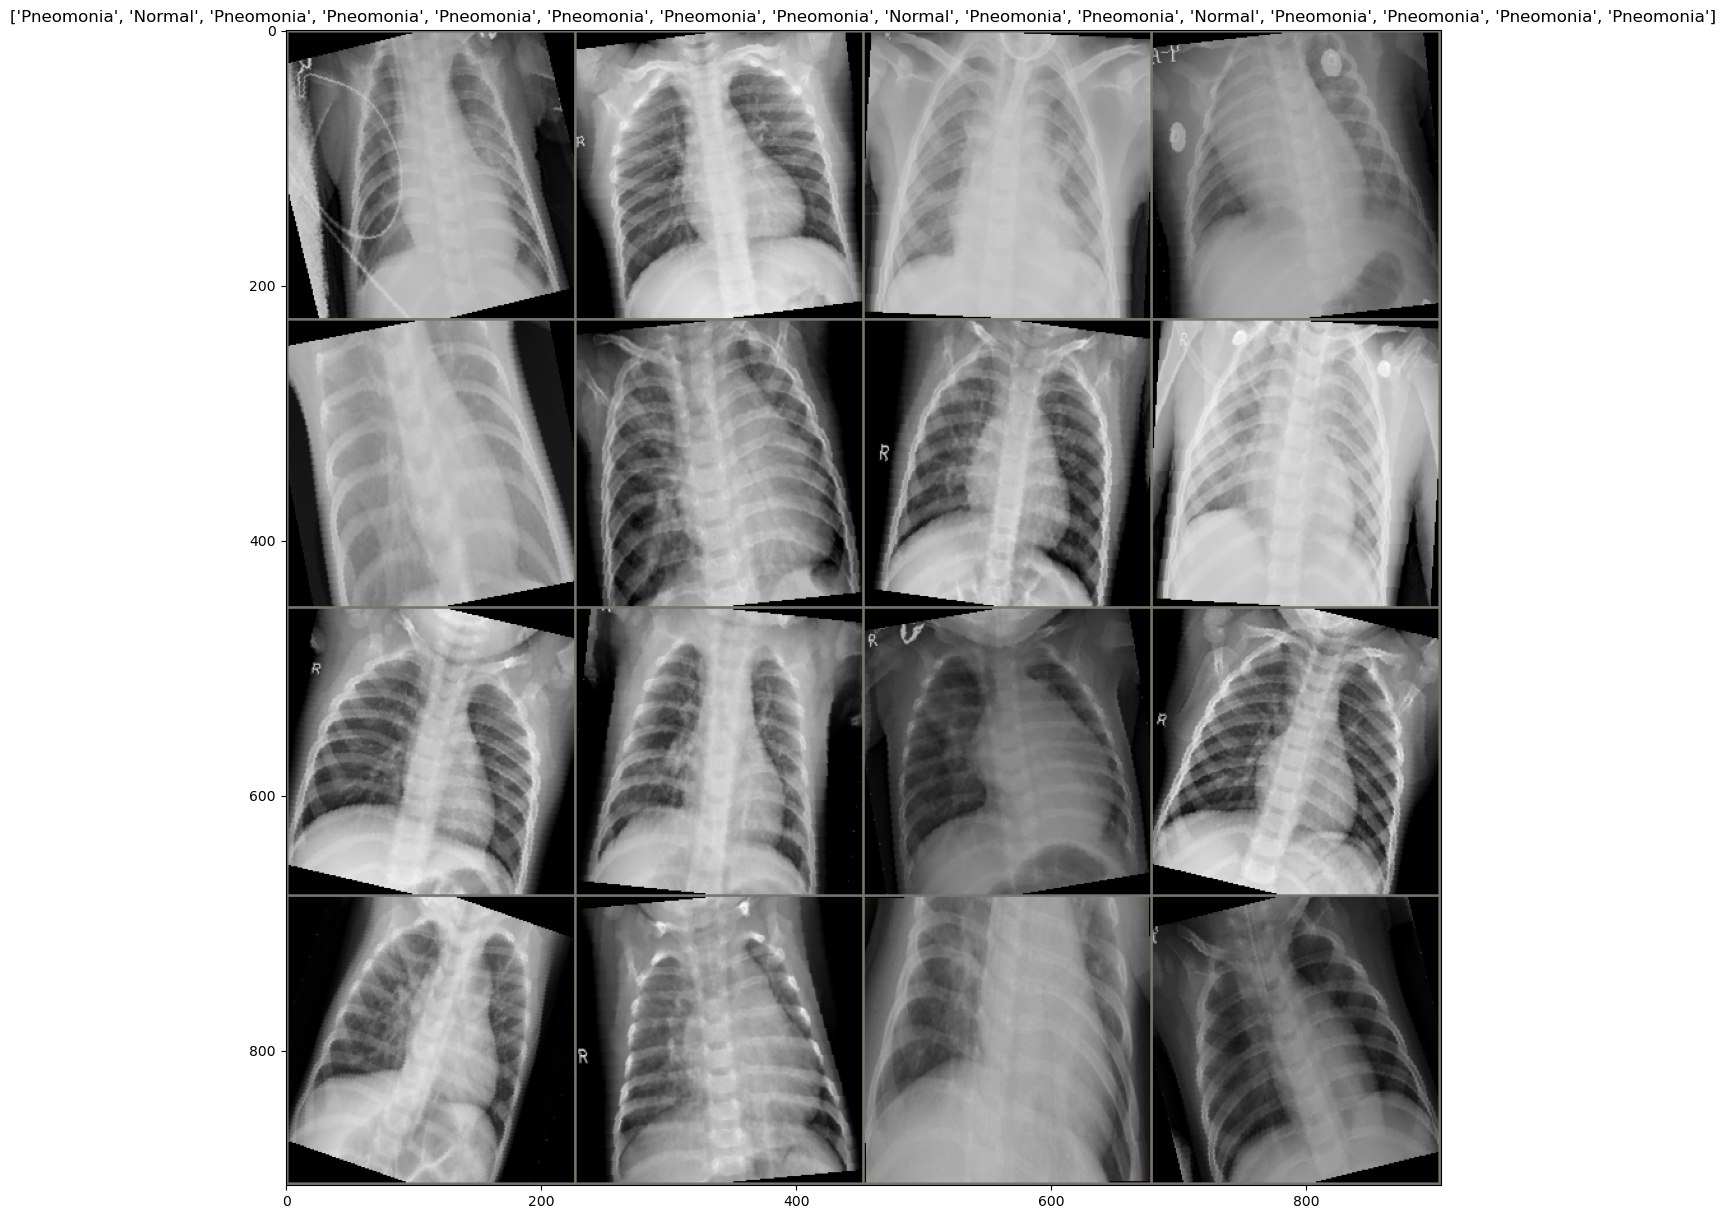

In [42]:
for images, labels in trainloader:
    out = make_grid(images, nrow=4)
    show_grid(out, title=[class_name[x] for x in labels])
    break  # Display only the first batch; remove this line if you want to visualize all batches


# Fine Tuning EfficientNet Model 

In [43]:
#!pip install timm

            

Fine-tuning a model is the process of taking a pre-trained neural network (a model that has been trained on a large dataset) and further training it on a different, typically smaller, dataset specific to a particular task. The goal of fine-tuning is to adapt the pre-trained model to the nuances and specifics of the new dataset, often improving its performance on the target task.
It takes pre-trained weights as initialization.

In [44]:
"""This line imports the neural network (nn) module from the PyTorch library.
torch.nn is a submodule of PyTorch that provides classes for building and training neural networks."""
from torch import nn 
"""This line imports the functional module from the PyTorch library and assigns it the alias F.
The functional module contains functions that don't have any parameters, such as activation functions like ReLU (F.relu) 
and pooling operations."""
import torch.nn.functional as F
"""This line imports the timm library.
timm (pyTorch Image Models) is a library that provides a collection of pre-trained models for image classification and 
other computer vision tasks."""
import timm 
"""create_model: This is a function provided by the timm library for creating instances of pre-defined models. It takes 
a model name as an argument and returns an instance of the specified model."""


model = timm.create_model(CFG.model_name,pretrained = True)

"""this code is iterating over all parameters in the PyTorch model and setting the requires_grad attribute to False 
for each parameter. This is a common practice when you want to freeze the weights of certain layers in a neural network, 
preventing them from being updated during training. Freezing certain layers is often useful during transfer learning, where 
you might use a pre-trained model and fine-tune only a portion of the model on a new task or dataset.requires_grad is an 
attribute in PyTorch that indicates whether a parameter should have its gradients computed during backpropagation. 
If requires_grad is set to False, the parameter's weights will not be updated during the optimization process."""

for param in model.parameters():
    param.requires_grad = False



"""The code is modifying the classifier attribute of a PyTorch model.

The code you provided is modifying the classifier attribute of a PyTorch model. 
Let's break down each component of the modification:


model.classifier = nn.Sequential(
    nn.Linear(in_features=1792, out_features=625),
    nn.ReLU(),
    nn.Dropout(p=0.3),
    nn.Linear(in_features=625, out_features=256),
    nn.ReLU(),
    nn.Linear(in_features=256, out_features=2)
)
nn.Sequential:

nn.Sequential is a container module in PyTorch that allows you to define a sequence of layers. 
The layers will be executed in the order they are defined when the forward pass is called.

nn.Linear:

nn.Linear is a fully connected (linear) layer in PyTorch. It applies a linear transformation to the input data, where the 
weights are learned during training.
In deep learning, a linear transformation involves multiplying the input features by weights, adding a bias term, and obtaining an output. Mathematically, it is represented as 
y=Wx+b, where W is the weight matrix, x is the input, and b is the bias vector. This operation forms the foundation of neural network layers, providing a linear relationship between inputs and outputs. Activation functions like ReLU are subsequently applied to introduce non-linearity and enable the modeling of complex patterns.
The first nn.Linear in your sequence has an input size of 1792 and an output size of 625. 
The second has an input size of 625 and an output size of 256. The third has an input size of 256 and an output size of 2.

nn.ReLU:

ReLU (Rectified Linear Unit) introduces non-linearity in neural networks by thresholding the input. If the input is positive, the output is the input value; if it's negative or zero, the output is set to zero. This thresholding operation creates a piecewise linear function that helps model complex relationships in data. ReLU's non-linearity is crucial for enabling neural networks to learn hierarchical features, avoid vanishing gradient issues, and efficiently capture intricate patterns. Its simplicity and effectiveness make it a widely used activation function in deep learning architectures.

nn.Dropout:

nn.Dropout is a regularization technique that helps prevent overfitting. It randomly sets a fraction of input units to zero 
during training (specified by the p parameter), which can be thought of as temporarily removing those connections.neurons is set to zero during each training iteration. This helps prevent overfitting by promoting more robust and generalized learning. It can be seen as training multiple models simultaneously, creating an ensemble effect, and is typically applied to hidden layers. The dropout rate, determining the fraction of neurons to drop, is a key parameter. Dropout enhances the performance of deep learning models by improving their ability to generalize to new data.

The dropout rate is a hyperparameter that defines the fraction of neurons to drop during each training iteration. The typical range for the dropout rate is between 0.2 and 0.5. This means that, on average, 20% to 50% of the neurons are set to zero during each update to prevent overfitting.

Now, let's summarize what this modification does to the classifier attribute of the model:

It replaces the existing classifier with a new sequence of layers.
The new classifier consists of three linear layers with ReLU activations in between. The first linear layer has an input 
size of 1792 and an output size of 625. The second linear layer has an input size of 625 and an output size of 256. 
The third linear layer has an input size of 256 and an output size of 2.
Dropout with a probability of 0.3 is applied after the first ReLU activation.
This kind of modification is often done when you want to customize or replace the classifier of a pre-trained model. 
In the context of transfer learning, you use a pre-trained model and replace the final classifier to adapt the model
to a specific classification task with a different number of classes."""
    


In [45]:
model.classifier = nn.Sequential(

    nn.Linear(in_features = 1792, out_features = 625),
    nn.ReLU(),
    nn.Dropout(p=0.3),
    nn.Linear(in_features = 625, out_features = 256),
    nn.ReLU(),
    nn.Linear(in_features = 256, out_features = 2)
)

#model



In [46]:
#!pip install torchsummary
    


This code is using the torchsummary library to generate a summary of the PyTorch model (model). This summary includes information about the layers, output shapes, and the total number of parameters in the model. The input_size argument specifies the expected input size of the model.from torchsummary import summary:

Imports the summary function from the torchsummary library. This function is used to generate a summary of a PyTorch model.
summary(model, input_size=(3, 224, 224)):

Calls the summary function with two arguments:
model: The PyTorch model for which you want to generate a summary.
input_size=(3, 224, 224): The expected input size of the model. In this case, it's a 3-channel image with a size of 224x224 pixels.
When you run this code, the summary function will print a summary of the model to the console. The summary includes information such as the layers, output shapes at each layer, and the total number of parameters in the model. This can be very useful for quickly understanding the architecture of a neural network and verifying that it matches your expectations.



In [47]:
from torchsummary import summary 

summary(model,input_size=(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
        Conv2dSame-1         [-1, 48, 112, 112]           1,296
          Identity-2         [-1, 48, 112, 112]               0
              SiLU-3         [-1, 48, 112, 112]               0
    BatchNormAct2d-4         [-1, 48, 112, 112]              96
            Conv2d-5         [-1, 48, 112, 112]             432
          Identity-6         [-1, 48, 112, 112]               0
              SiLU-7         [-1, 48, 112, 112]               0
    BatchNormAct2d-8         [-1, 48, 112, 112]              96
            Conv2d-9             [-1, 12, 1, 1]             588
             SiLU-10             [-1, 12, 1, 1]               0
           Conv2d-11             [-1, 48, 1, 1]             624
          Sigmoid-12             [-1, 48, 1, 1]               0
    SqueezeExcite-13         [-1, 48, 112, 112]               0
           Conv2d-14         [-1, 24, 1

# Build a Simple Trainer

In [48]:
def accuracy(y_pred,y_true):
    y_pred = F.softmax(y_pred,dim = 1)
    top_p,top_class = y_pred.topk(1,dim = 1)
    equals = top_class == y_true.view(*top_class.shape)
    return torch.mean(equals.type(torch.FloatTensor))

In [49]:
from tqdm import tqdm

In [50]:
class PneumoniaTrainer():
    
    def __init__(self,criterion,optimizer,schedular):
        self.criterion = criterion
        self.optimizer = optimizer
        self.schedular = schedular
    
    def train_batch_loop(self,model,trainloader):
        
        train_acc=0.0
        train_loss=0.0
        
        for images,labels in tqdm(trainloader):
            
            #Transfers the input images and labels to the specified device (GPU or CPU).
            
            images = images.to(device)
            labels = labels.to(device)
            
            #Forward Pass(Prediction): Passes the input images through the model to obtain predictions (logits).
            #Here we are using crossentropyloss, and it takes raw output without softmax activation
            logits = model(images)
            
            #Calculates the loss between the predicted logits and the ground truth labels using the specified criterion 
            #(cross-entropy in this case).
            loss = self.criterion(logits,labels)
            
            #Backward Pass (Gradient Calculation): Initiates backpropagation by computing the gradients of the loss with 
            #respect to the model parameters.
            self.optimizer.zero_grad()
            loss.backward()
            #Updates the model's parameters using the optimizer based on the computed gradients.
            self.optimizer.step()
            
            #Keeps track of the total training accuracy and loss over all batches.
            
            train_loss +=loss.item()
            train_acc +=accuracy(logits,labels)
            
        #Returns the average training accuracy and loss over all batches.
            
        return train_acc/len(trainloader), train_loss/ len(trainloader)

    
    def valid_batch_loop(self,model,validloader):
        """During validation or testing, the model is in evaluation mode (model.eval()), and no training-related operations, 
        such as backward passes and parameter updates, are performed."""
        valid_acc = 0.0
        valid_loss = 0.0
        
        for images,labels in tqdm(validloader):
            images = images.to(device)
            labels = labels.to(device)
            
            logits = model(images)
            loss = self.criterion(logits,labels)
            
            valid_loss +=loss.item()
            valid_acc += accuracy(logits,labels)
            
        return valid_acc/len(validloader),valid_loss/len(validloader)
            
        
    def fit(self,model,trainloader,validloader,epochs):
        
        """the line model = model.to(device) ensures that the model is moved to the specified device. 
        If a GPU is available (torch.cuda.is_available() is True), it uses the GPU; otherwise, it falls back to the CPU."""
        
        
        model = model.to(device)
        
        """It will be used to track the minimum validation loss during training. The loss (or error) calculated on the 
        validation dataset. The loss is a measure of the difference between the predicted values and the actual values 
        (ground truth) for the validation examples. Lower validation loss indicates better generalization."""
        
        valid_min_loss = np.Inf
        
        
        """
       Dropout layers are employed during training to mitigate overfitting by randomly deactivating a fraction of input units 
       in each forward and backward pass. This discourages the model from relying too heavily on specific neurons, promoting 
       more robust learning. During training, dropout layers are active to introduce this randomness. However, during 
       evaluation or testing, dropout is turned off to produce consistent predictions on new data, ensuring the entire network 
       contributes to the predictions without introducing variability. This approach helps balance effective training and 
       reliable inference in neural networks."""
        
        
        for i in range(epochs):
            model.train() #turn on dropout
            avg_train_acc, avg_train_loss = self.train_batch_loop(model,trainloader)
            model.eval() #turn off dropout batch norm
            avg_valid_acc, avg_valid_loss = self.valid_batch_loop(model,validloader)
            
            if avg_valid_loss <= valid_min_loss:
                print("Valid loss decreased {} --> {}".format(valid_min_loss,avg_valid_loss))
                torch.save(model.state_dict(),"PneumoniaModel.pt")
                valid_min_loss = avg_valid_loss
            
            print("Epoch : {} Train Loss :{} Train Acc : {}".format(i+1,avg_train_loss,avg_train_acc))
            print("Epoch : {} Valid Loss :{} Valid Acc : {}".format(i+1,avg_valid_loss,avg_valid_acc))

# Training Model 


Trained on google colab : https://colab.research.google.com/drive/1C5nNPj7OLYMGnNvWBU5W2zSXfgWDdXCo?usp=sharing

nn.CrossEntropyLoss() is a loss function commonly used in classification tasks, like image classification. It combines softmax activation and negative log-likelihood loss. During training, it takes the model's raw predictions (logits) and ground truth labels to compute a loss that penalizes deviations from the correct class probabilities. It's suitable for scenarios where each input belongs to only one class.


The line optimizer = torch.optim.Adam(model.parameters(), lr=CFG.lr) initializes an Adam optimizer for updating the weights of a PyTorch model during training. Adam is a popular optimization algorithm in deep learning, and lr=CFG.lr sets the learning rate, determining the step size during optimization.



In [51]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=CFG.lr)
schedular = None

#Creating an instance of PneumoniaTrainer class
trainer = PneumoniaTrainer(criterion, optimizer, schedular)

#Calling fit function inside the class
trainer.fit(model,trainloader,validloader,epochs = CFG.epochs)


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.57s/it]

Valid loss decreased inf --> 0.8065976500511169
Epoch : 1 Train Loss :0.24705057655192592 Train Acc : 0.8966640830039978
Epoch : 1 Valid Loss :0.8065976500511169 Valid Acc : 0.75


# Plot Results 

In [52]:
def view_classify(image,ps,label):
    
    class_name = ['NORMAL', 'PNEUMONIA']
    classes = np.array(class_name)

    ps = ps.cpu().data.numpy().squeeze()
    
    image = image.permute(1,2,0)
    mean = torch.FloatTensor([0.485, 0.456, 0.406])
    std = torch.FloatTensor([0.229, 0.224, 0.225])
    
    
    image = image*std + mean
    img = np.clip(image,0,1)
    
    fig, (ax1, ax2) = plt.subplots(figsize=(8,12), ncols=2)
    ax1.imshow(img)
    ax1.set_title('Ground Truth : {}'.format(class_name[label]))
    ax1.axis('off')
    ax2.barh(classes, ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(classes)
    ax2.set_yticklabels(classes)
    ax2.set_title('Predicted Class')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

    return None

In [53]:
# We are using CloabPneumoniaModel for prediction cause it is trained on gpu using epochs=20.
# map_location is to map the model from gpu to cpu
model.load_state_dict(torch.load('ColabPneumoniaModel.pt',map_location=device))

model.eval()
avg_test_acc , avg_test_loss = trainer.valid_batch_loop(model,testloader)

print("Test Acc : {}".format(avg_test_acc))
print("Test Loss : {}".format(avg_test_loss))




print("Test Loss : {}".format(avg_test_acc))
print("Test Acc : {}".format(avg_test_loss))

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [01:32<00:00,  2.37s/it]

Test Acc : 0.879807710647583
Test Loss : 0.2958922629746107
Test Loss : 0.879807710647583
Test Acc : 0.2958922629746107


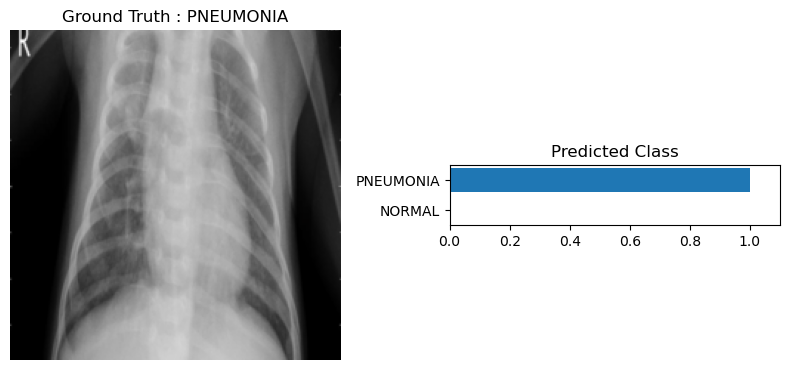

In [54]:
image,label = testset[423]

logit = model(image.unsqueeze(0)) #(3,224,224) -> (1,3,224,224)
ps = F.softmax(logit,dim = 1)

view_classify(image,ps,label)